In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
X ,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)


In [4]:
X

array([[ -9.1139443 ,   6.81361629],
       [ -9.35457578,   7.09278959],
       [ -2.01567068,   8.28177994],
       [ -7.01023591,  -6.22084348],
       [-10.06120248,   6.71867113],
       [ -6.36503142,  -6.97607271],
       [  4.74378739,   2.20436011],
       [ -6.63186832,  -7.21834432],
       [ -2.79670217,   8.90289074],
       [  3.92509674,   2.36710185],
       [ -2.87022159,  10.12565304],
       [  4.85408813,   1.55742393],
       [ -2.38387947,   7.83848405],
       [ -3.35842007,   8.76189893],
       [ -9.2287133 ,   7.03124769],
       [ -2.93042948,   8.81768884],
       [ -9.81485322,   7.35237388],
       [  3.42479328,   2.08504227],
       [ -2.45095109,   9.59547312],
       [ -2.15708337,  10.3285595 ],
       [  5.33503618,   1.48076029],
       [ -2.60596905,   9.25671664],
       [ -6.29455535,  -6.96834402],
       [ -8.90572459,   7.19094116],
       [ -2.78724824,   8.73484828],
       [ -8.52044525,   8.18846409],
       [ -9.18439055,   7.77675765],
 

In [5]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df.head()

,Feature_1,Feature_2
0,-9.113944,6.813616
1,-9.354576,7.092790
2,-2.015671,8.281780
3,-7.010236,-6.220843
4,-10.061202,6.718671


In [6]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)

In [7]:
df.head()

,Feature_1,Feature_2
0,-9.113944,6.813616
1,-9.354576,7.092790
2,-2.015671,8.281780
3,-7.010236,-6.220843
4,-10.061202,6.718671


NO labels are present
Now for Elbow Method:capture WCSS (inertia)

In [9]:
inertia = []
K = range(1,11)

In [10]:
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_) 

Text(0.5, 0, 'Number of clusters (k)')

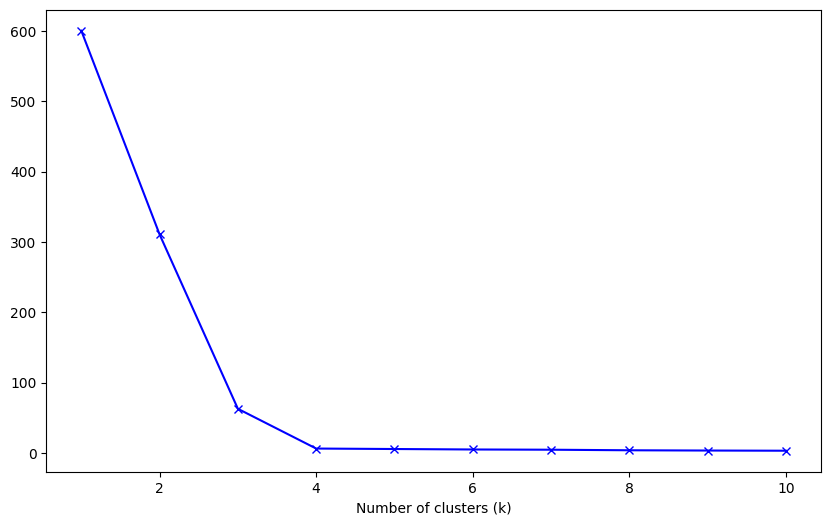

In [13]:
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')

Best Cluster points =4

In [14]:
k_means_final = KMeans(n_clusters=4, random_state=42)
k_means_final.fit(scaled_data)
y_kmeans = k_means_final.predict(scaled_data)


In [15]:
y_kmeans

array([3, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1,
       0, 2, 1, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3], d

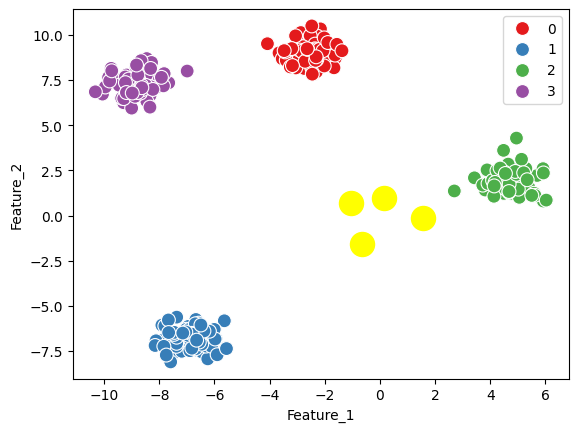

In [22]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=y_kmeans, palette='Set1', s=100)
plt.scatter(k_means_final.cluster_centers_[:, 0], k_means_final.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, y_kmeans)
print(score)


0.879591338894901
